# Moore-Penrose Inverse and Linear Regression

Create $N=100$ somewhat correlated data points in $\mathbb{R}^3$.

In [68]:
format compact % For compact printing of results
mu = [2 3 4];
Cov = [2 1.5 2; 1.5 4 3; 2 3 3]
rng('default')  % For reproducibility
N=100
R = mvnrnd(mu,Cov,N);
Cor = corrcoef(R)

Cov =
    2.0000    1.5000    2.0000
    1.5000    4.0000    3.0000
    2.0000    3.0000    3.0000
N =
   100
Cor =
    1.0000    0.6253    0.8879
    0.6253    1.0000    0.8658
    0.8879    0.8658    1.0000



Plot the data.

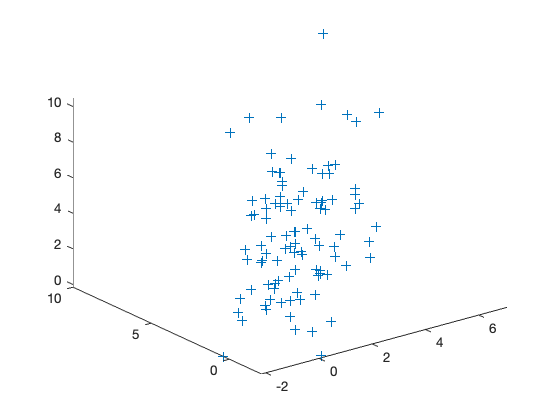

In [34]:
plot3(R(:,1),R(:,2),R(:,3),'+');

Get $x,y$, the first two columns of the data. It is an $N\times 2$ matrix.

In [90]:
data(:,1) = R(:,1)-mean(R(:,1));
data(:,2) = R(:,2)-mean(R(:,2));
%data

Compute the Moore-Penrose inverse of that matrix.

In [89]:
data_inv = pinv(data);

Resolve for the parameters (minimizing RSS) by multiplying the Moore-Penrose inverse with $z$, the third column of the data. 

In [37]:
param = data_inv*(R(:,3)-mean(R(:,3)))

param =
    0.6913
    0.4678



Plot the surface (slope defined by the parameters) together with the original data.

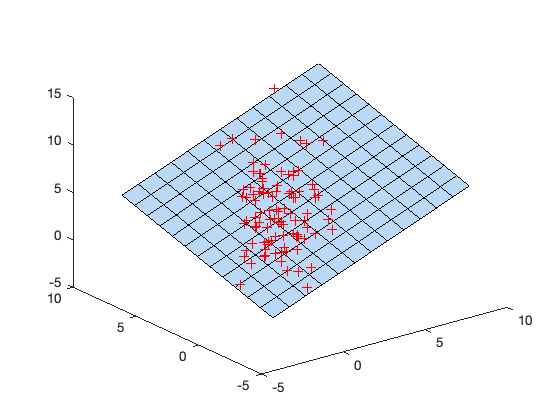

In [48]:
[X,Y] = meshgrid(-2:10,-2:10);
Z = param(1)*X+param(2)*Y;
plot3(R(:,1),R(:,2),R(:,3),'+r');
hold on;
surf(X,Y,Z,'FaceAlpha',0.3,'FaceColor',[0.1, 0.5, 0.9])

Single Value decomposition of the data matrix into $U,\Sigma,V$. Check if we can reproduce the original data.

In [71]:
[U,S,V] = svd(data);
data2 = U*S*transpose(V);
#check equality of matrices up to rounding errors
logic_matrix = abs(data-data2) < 1e4*eps(min(abs(data),abs(data2)));
isequal(logic_matrix, ones(N,2))

ans =
  logical
   1



Calculate the Moore-Penrose inverse from $U,\Sigma,V$.

In [88]:
Splus = zeros(N,2);
Splus(1,1)=1/S(1,1);
Splus(2,2)=1/S(2,2);
data_pinv = transpose(U*Splus*transpose(V));

Check if it is correct.

In [87]:
check_pinv = data_pinv*data
param2 = data_pinv*(R(:,3)-mean(R(:,3)))

check_pinv =
    1.0000    0.0000
   -0.0000    1.0000
param2 =
    0.6913
    0.4678

